<a href="https://colab.research.google.com/github/kavinCodes/ML_portfolio/blob/master/NN_Equation_Solver_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing necessary libraries**

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.utils import normalize

##**Importing data and visualizing it**

In [0]:
mnist = keras.datasets.mnist

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


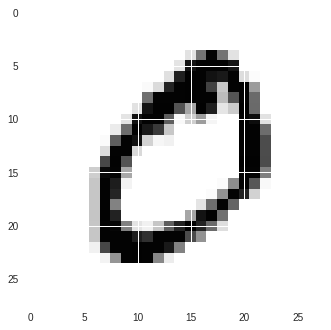

In [0]:
plt.imshow(x_train[1])
# plt.show() # this was needed to actually print the drawn image produced by imshow in the past

In [0]:
x_train_norm = normalize(x_train)
x_test_norm = normalize(x_test)

## **Building the model**

In [0]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_norm, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 18s 293us/step - loss: 0.2630 - acc: 0.9218
Epoch 2/3
60000/60000 [==============================] - 17s 279us/step - loss: 0.1096 - acc: 0.9664
Epoch 3/3
60000/60000 [==============================] - 17s 282us/step - loss: 0.0749 - acc: 0.9758


In [0]:
test_loss, test_acc = model.evaluate(x_test_norm, y_test)

10000/10000 [==============================] - 0s 34us/step


In [0]:
print('Test loss is {} \nTest accuracy is {}'.format(test_loss, test_acc))

Test loss is 0.08722381408987567 
Test accuracy is 0.9734


## **Trying out NN prediction of the equation:** $$y = \sqrt[3]{x}$$

In [4]:
## defining test and train sets
x = np.random.rand(1000)*1000
x_num_train = x[:800]
x_num_test = x[800:]

## defining test and train labels
def cube_root(x):
  return np.cbrt(x)

y_num_train = cube_root(x_num_train)
y_num_test = cube_root(x_num_test)

x_num_train = x_num_train.reshape((-1,1))
x_num_test = x_num_test.reshape((-1,1))
print(x_num_train.shape, x_num_test.shape)
# print(y_num_train.shape, y_num_test.shape)

(800, 1) (200, 1)


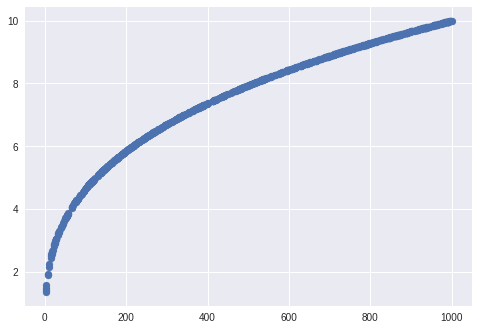

In [5]:
plt.scatter(x_num_train,y_num_train)

In [10]:
x_grid_train = np.random.rand(1000,1)
y_grid_train = np.random.rand(1000,1)
labels_train = y_grid_train >= cube_root(x_grid_train)

labels_train = labels_train.astype('int')
combined_train = np.concatenate((x_grid_train, y_grid_train), axis=1)
combined_train.shape

(1000, 2)

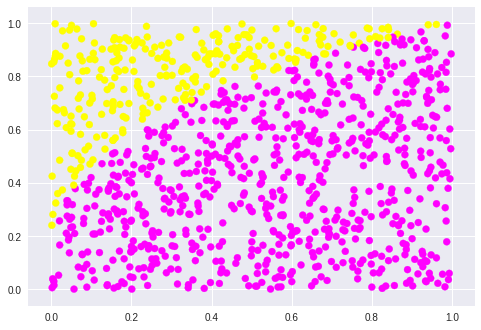

In [11]:
plt.scatter(x_grid_train, y_grid_train, c=labels_train, cmap='spring')

In [0]:
model_2 = Sequential()

model_2.add(Dense(128, activation=tf.nn.relu))
model_2.add(Dense(128, activation=tf.nn.relu))
model_2.add(Dense(1, activation=tf.nn.relu))



In [16]:
model_2.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])
model_2.fit(combined_train, labels_train, epochs=20)

Epoch 1/20
1000/1000 [==============================] - 0s 314us/step - loss: 0.0139 - acc: 0.9840
Epoch 2/20
1000/1000 [==============================] - 0s 45us/step - loss: 0.0113 - acc: 0.9880
Epoch 3/20
1000/1000 [==============================] - 0s 46us/step - loss: 0.0108 - acc: 0.9880
Epoch 4/20
1000/1000 [==============================] - 0s 44us/step - loss: 0.0118 - acc: 0.9830
Epoch 5/20
1000/1000 [==============================] - 0s 44us/step - loss: 0.0124 - acc: 0.9860
Epoch 6/20
1000/1000 [==============================] - 0s 46us/step - loss: 0.0114 - acc: 0.9870
Epoch 7/20
1000/1000 [==============================] - 0s 49us/step - loss: 0.0086 - acc: 0.9910
Epoch 8/20
1000/1000 [==============================] - 0s 47us/step - loss: 0.0116 - acc: 0.9850
Epoch 9/20
1000/1000 [==============================] - 0s 45us/step - loss: 0.0088 - acc: 0.9890
Epoch 10/20
1000/1000 [==============================] - 0s 50us/step - loss: 0.0121 - acc: 0.9860
Epoch 11/20
1000/1

In [0]:
x_grid_test = np.random.rand(200,1)
y_grid_test = np.random.rand(200,1)
labels_test = y_grid_test >= cube_root(x_grid_test)
labels_test = labels_test.astype('int')

combined_test = np.concatenate((x_grid_test, y_grid_test), axis=1)

In [18]:
test_loss, test_acc = model_2.evaluate(combined_test, labels_test)

print(test_loss, test_acc)

200/200 [==============================] - 0s 470us/step
0.011315667324233801 0.985


In [19]:
labels_test_predict = np.round(model_2.predict(combined_test))
print(labels_test_predict.shape)
print(labels_test.shape)


(200, 1)
(200, 1)


In [20]:
type(combined_test[:,0])

numpy.ndarray

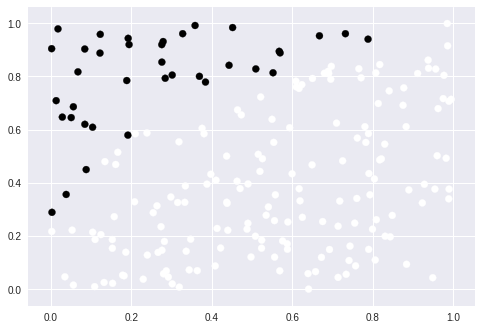

In [21]:
plt.scatter(x_grid_test, y_grid_test, c=labels_test_predict)

## **...trying it again with tighter constraints on 'y' having a 'True' label**

In [0]:
x_grid_train = np.random.rand(1000,1)
y_grid_train = cube_root(x_grid_train) + np.random.randn(1000,1)*0.1
labels_train = (y_grid_train <= cube_root(x_grid_train) + 0.05) & (y_grid_train >= cube_root(x_grid_train) - 0.05)

labels_train = labels_train.astype('int')
combined_train = np.concatenate((x_grid_train, y_grid_train), axis=1)

In [80]:
model_2 = Sequential()

model_2.add(Dense(128, activation=tf.nn.relu))
model_2.add(Dense(128, activation=tf.nn.relu))
model_2.add(Dense(1, activation=tf.nn.relu))

model_2.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])
model_2.fit(combined_train, labels_train, epochs=50)

Epoch 1/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2588 - acc: 0.5860
Epoch 2/50
1000/1000 [==============================] - 0s 50us/step - loss: 0.2464 - acc: 0.5900
Epoch 3/50
1000/1000 [==============================] - 0s 51us/step - loss: 0.2417 - acc: 0.6140
Epoch 4/50
1000/1000 [==============================] - 0s 52us/step - loss: 0.2413 - acc: 0.6040
Epoch 5/50
1000/1000 [==============================] - 0s 52us/step - loss: 0.2386 - acc: 0.6130
Epoch 6/50
1000/1000 [==============================] - 0s 62us/step - loss: 0.2391 - acc: 0.6040
Epoch 7/50
1000/1000 [==============================] - 0s 62us/step - loss: 0.2394 - acc: 0.5790
Epoch 8/50
1000/1000 [==============================] - 0s 60us/step - loss: 0.2362 - acc: 0.6150
Epoch 9/50
1000/1000 [==============================] - 0s 62us/step - loss: 0.2315 - acc: 0.6150
Epoch 10/50
1000/1000 [==============================] - 0s 55us/step - loss: 0.2296 - acc: 0.6150
Epoch 11/50
1000/100

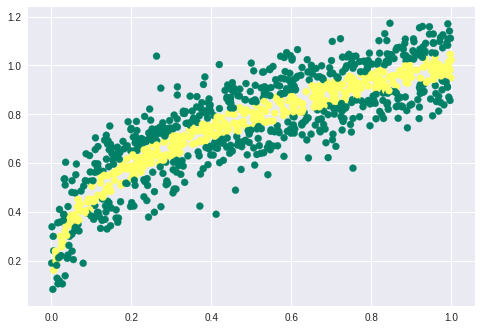

In [81]:
plt.scatter(x_grid_train, y_grid_train, c=labels_train, cmap='summer')

##**Defining a class and functions to streamline model building and training**

In [0]:
## Creating a Build class to construct different types of models
class build_():
    
  def __init__(self):
    pass
  
  def a_base_model(self):
    temp = Sequential()
    temp.add(Dense(128, activation=tf.nn.relu))
    temp.add(Dense(128, activation=tf.nn.relu))
    temp.add(Dense(1, activation=tf.nn.relu))
    return temp
  
  def a_level_1_model(self):
    pass

## Function to train a model on some data
def equation_training(model, train, labels, epochs=50):
  model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['accuracy'])
  model.fit(train, labels, epochs=epochs)
    
  

In [84]:
model_3 = build_().a_base_model()

equation_training(model_3, combined_train, labels_train)

Epoch 1/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2624 - acc: 0.5750
Epoch 2/50
1000/1000 [==============================] - 0s 52us/step - loss: 0.2450 - acc: 0.5920
Epoch 3/50
1000/1000 [==============================] - 0s 51us/step - loss: 0.2427 - acc: 0.6100
Epoch 4/50
1000/1000 [==============================] - 0s 52us/step - loss: 0.2400 - acc: 0.5710
Epoch 5/50
1000/1000 [==============================] - 0s 52us/step - loss: 0.2415 - acc: 0.6150
Epoch 6/50
1000/1000 [==============================] - 0s 55us/step - loss: 0.2391 - acc: 0.6090
Epoch 7/50
1000/1000 [==============================] - 0s 59us/step - loss: 0.2351 - acc: 0.6150
Epoch 8/50
1000/1000 [==============================] - 0s 59us/step - loss: 0.2343 - acc: 0.6130
Epoch 9/50
1000/1000 [==============================] - 0s 61us/step - loss: 0.2322 - acc: 0.6130
Epoch 10/50
1000/1000 [==============================] - 0s 50us/step - loss: 0.2262 - acc: 0.6150
Epoch 11/50
1000/100

To Do:
1. Hold the test plot and draw a line of predictions 